# Differentiation

Derivatives can be found numerically in python and compared to analytic solutions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Nx = 500
x = np.linspace(-0.5,0.5,Nx)
dx = x[1]-x[0]

Let's start with a derivative from the practise problems
$$\frac{d}{dx} \ln(\cos(3x)) = -3 \tan (3x).$$

In [3]:
def f(x):
    return np.log(np.cos(3.0*x))

def deriv_f(x):
    return -3.0*np.tan(3.0*x)

grad = np.gradient(f(x), x)

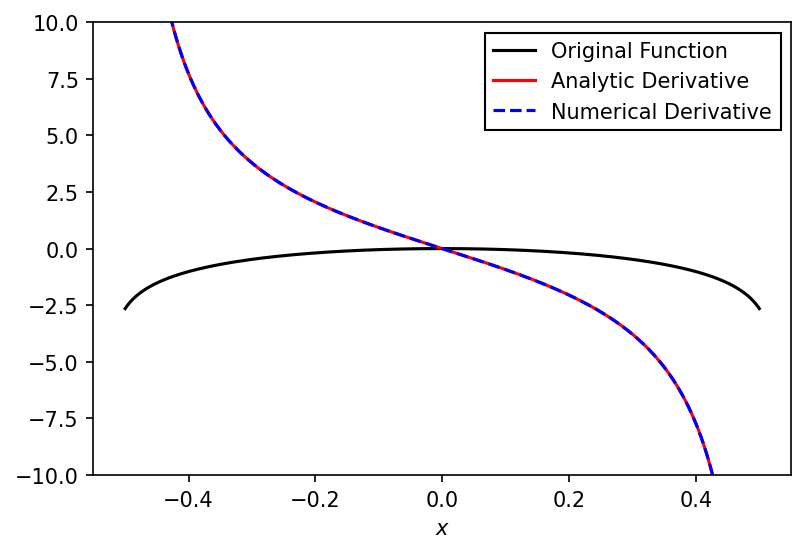

In [4]:
plt.figure(dpi=150)
plt.plot(x, f(x), 'k-', label="Original Function")
plt.plot(x, deriv_f(x), 'r-', label="Analytic Derivative")
plt.plot(x, grad, 'b--', label="Numerical Derivative")
plt.legend(fancybox=False, edgecolor="k", framealpha=1)
plt.ylim(-10,10)
plt.xlabel("$x$")
plt.show()

## But what's going on inside np.gradient()?

You know from looking at first principles differentiation that you can define the derivative as a *forwards derivative*
$$\frac{d}{dx} f(x) = \frac{ f(x + h) - f(x) }{h},$$
a *backwards derivative*
$$\frac{d}{dx} f(x) = \frac{ f(x) - f(x-h) }{h},$$
or a *symmetric derivative*
$$\frac{d}{dx} f(x) = \frac{ f(x + h) - f(x-h) }{2 h},$$
where in every case $h$ should be small.  

This is exaclty how computers approximate integrals and is the key to the finite difference method of solving differential equations.  Let's see how this works.

In [5]:
# Define some function we want to differentiate
def f(x):
    return np.cos(x)

# Some small step, h
# Try making this large and see what happens
h = 0.1

# Now, define the forwards derivative
def forwards_f(x):
    return ( f(x+h) - f(x) ) / h

# Define the backwards derivative
def backwards_f(x):
    return ( f(x) - f(x-h) ) / h

# Define the symmetric derivative
def symm_f(x):
    return ( f(x+h) - f(x-h) ) / ( 2.0*h )

In [6]:
x = np.linspace(-2.0*np.pi, 2.0*np.pi, 500)

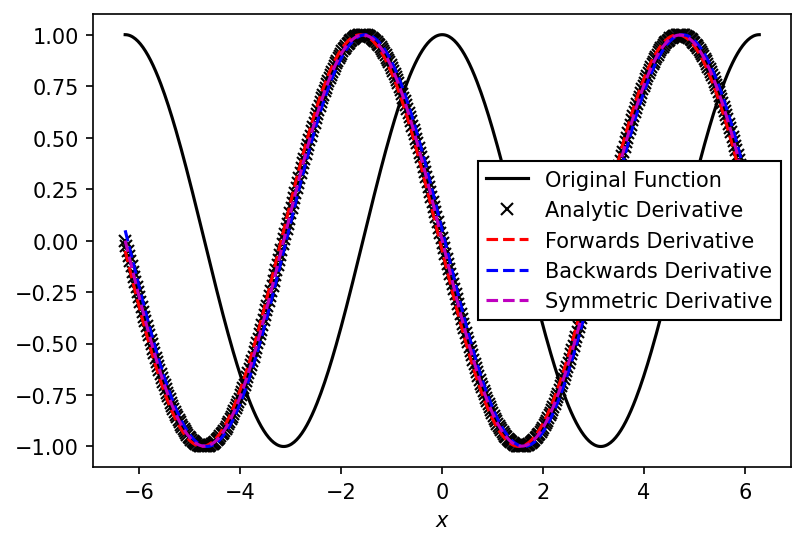

In [7]:
plt.figure(dpi=150)
plt.plot(x, f(x), 'k-', label="Original Function")
plt.plot(x, -np.sin(x), 'kx', label="Analytic Derivative")
plt.plot(x, forwards_f(x), 'r--', label="Forwards Derivative")
plt.plot(x, backwards_f(x), 'b--', label="Backwards Derivative")
plt.plot(x, symm_f(x), 'm--', label="Symmetric Derivative")

plt.xlabel("$x$")
plt.legend(fancybox=False, edgecolor="k", framealpha=1)

plt.show()

We can now look at how different each of the numerical approximations is from the true solution.  Try changing $h$ and see how this effects the error.

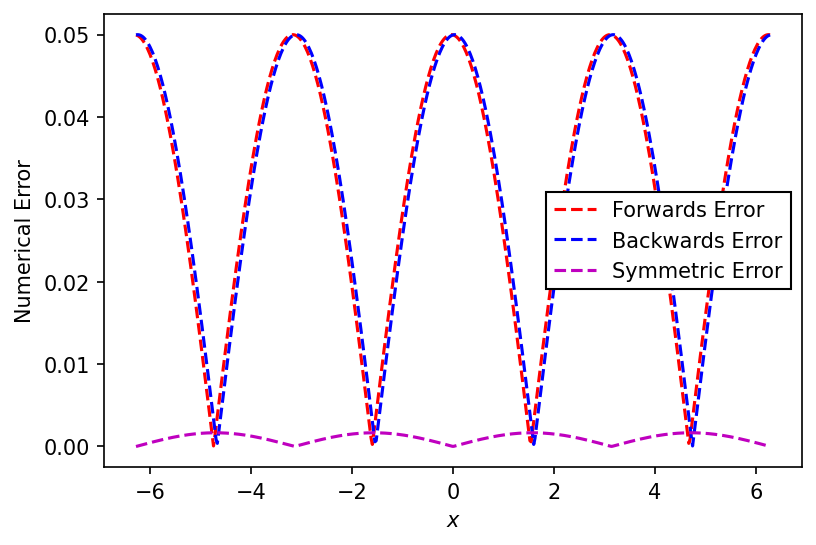

In [8]:
plt.figure(dpi=150)
plt.plot(x, np.abs(forwards_f(x) - -np.sin(x)), 'r--', label="Forwards Error")
plt.plot(x, np.abs(backwards_f(x) - -np.sin(x)), 'b--', label="Backwards Error")
plt.plot(x, np.abs(symm_f(x) - -np.sin(x)), 'm--', label="Symmetric Error")
plt.legend(fancybox=False, edgecolor="k", framealpha=1)
plt.xlabel("$x$")
plt.ylabel("Numerical Error")

plt.show()

Being able to find derivatives numerically is useful for when derivatives are very hard to find analytically.  How would you find 
$$\frac{d}{dx} \left[ \sin (x+1) \right]^x$$
analytically?

In [9]:
def f(x):
    return np.sin(x+1)**x

def deriv_f(x):
    h = 0.01
    return ( f(x+h) - f(x) ) / h

x = np.linspace(0,2,500)

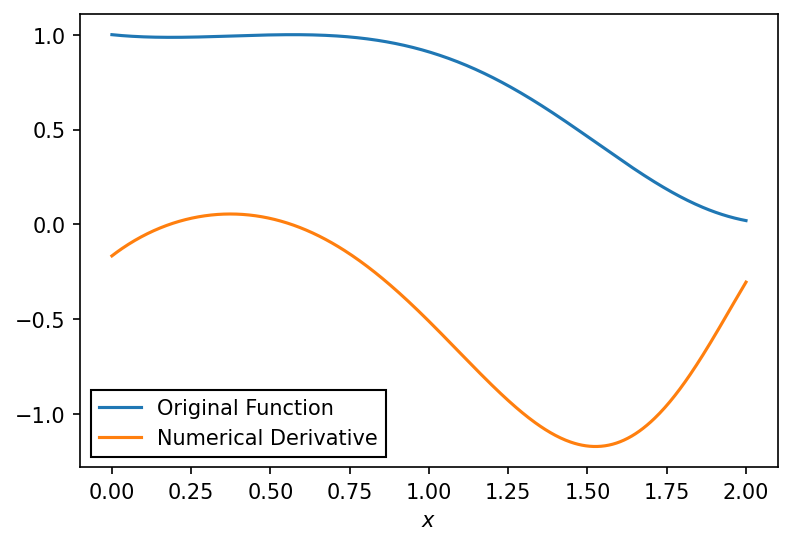

In [10]:
plt.figure(dpi=150)
plt.plot(x, f(x), label="Original Function")
plt.plot(x, deriv_f(x), label="Numerical Derivative")
plt.xlabel("$x$")
plt.legend(fancybox=False, edgecolor="k", framealpha=1)

plt.show()